In [1]:
import os, sys
import numpy as np

import pandas as pd
from keras.layers import Input, Dense, Flatten,Activation
from keras.layers import Conv1D, MaxPooling1D,Dropout,LSTM
from keras.layers import Embedding

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

from keras.utils import to_categorical

from numpy import zeros
from numpy import asarray

from keras.preprocessing.text import Tokenizer

from keras.preprocessing.sequence import pad_sequences

from keras.models import Sequential

from keras.layers import Dense
from keras.layers import Flatten

from keras.layers.embeddings import Embedding

import matplotlib.pyplot as plt
%matplotlib inline
# fix random seed for reproducibility
np.random.seed(42)

C:\Users\CE700\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### Reading  the Data

In [2]:
Data = pd.read_csv("train-1546603042473.csv")
Data_Test = pd.read_csv("test-1546603743049.csv")

In [3]:
Data.head()

,categories,converse
0,QUERIES FROM PHARMACY,please to verify instructions for drugname pat...
1,NEW APPOINTMENT,lmovm for patients mother to and schd rov trac...
2,OTHERS,labtype and insurance approval other incoming ...
3,OTHERS,clinical list changes medfusion secure electro...
4,MEDICATION RELATED,wants to wean off medication work phone name d...


In [4]:
Data_Test.head()

,id,converse
0,1,request to speak with rn no given patients ref...
1,2,patients husband ret name spouse for other pat...
2,3,fyi in his szs mom other he has an appointment...
3,4,Rx refill drugname from pharmacy name reason f...
4,5,need more time for testing dad is requesting a...


In [5]:
Data.shape

(48699, 2)

### Checking for Na's and Removing Na's

In [6]:
def find_remove_NAN(ds):
    print(ds.shape)
    mis_val = ds.isnull().sum()
    print(mis_val)
    ds.dropna(inplace=True)
    print(ds.shape)
    print(ds.info())

In [7]:
find_remove_NAN(Data)

(48699, 2)
categories     0
converse      32
dtype: int64
(48667, 2)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 48667 entries, 0 to 48698
Data columns (total 2 columns):
categories    48667 non-null object
converse      48667 non-null object
dtypes: object(2)
memory usage: 1.1+ MB
None


In [ ]:
find_remove_NAN(Data_Test)

### Checking For Unique Categories

In [9]:
Data['categories'].unique()

array(['QUERIES FROM PHARMACY', 'NEW APPOINTMENT', 'OTHERS',
       'MEDICATION RELATED',
       'SHARING OF HEALTH RECORDS (FAX, E-MAIL, ETC.)', 'REFILL',
       'PRIOR AUTHORIZATION', 'RESCHEDULING', 'SYMPTOMS', 'LAB RESULTS',
       'FOLLOW UP ON PREVIOUS REQUEST', 'PROVIDER', 'CHANGE OF PROVIDER',
       'SHARING OF LAB RECORDS (FAX, E-MAIL, ETC.)',
       'QUERY ON CURRENT APPOINTMENT', 'RUNNING LATE TO APPOINTMENT',
       'CANCELLATION', 'CHANGE OF PHARMACY',
       'QUERIES FROM INSURANCE FIRM', 'JUNK', 'CHANGE OF HOSPITAL'],
      dtype=object)

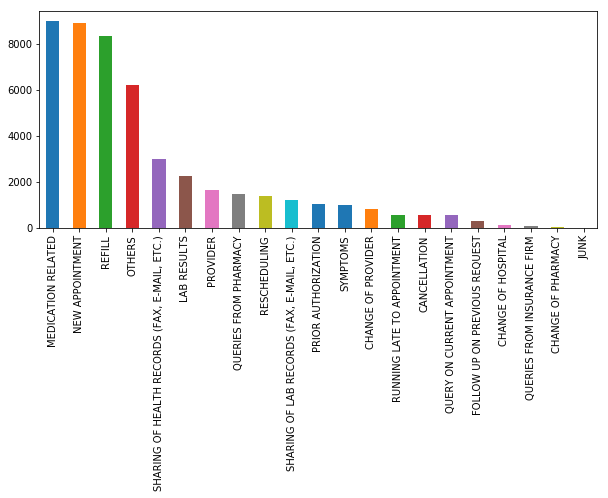

In [10]:
my_tags =['QUERIES FROM PHARMACY', 'NEW APPOINTMENT', 'OTHERS',
       'MEDICATION RELATED',
       'SHARING OF HEALTH RECORDS (FAX, E-MAIL, ETC.)', 'REFILL',
       'PRIOR AUTHORIZATION', 'RESCHEDULING', 'SYMPTOMS', 'LAB RESULTS',
       'FOLLOW UP ON PREVIOUS REQUEST', 'PROVIDER', 'CHANGE OF PROVIDER',
       'SHARING OF LAB RECORDS (FAX, E-MAIL, ETC.)',
       'QUERY ON CURRENT APPOINTMENT', 'RUNNING LATE TO APPOINTMENT',
       'CANCELLATION', 'CHANGE OF PHARMACY',
       'QUERIES FROM INSURANCE FIRM', 'JUNK', 'CHANGE OF HOSPITAL']
plt.figure(figsize=(10,4))
Data.categories.value_counts().plot(kind='bar');

### Label Encoding

In [11]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
Data['categories'] = labelencoder.fit_transform(Data['categories'])

### Stop Words Removal

In [12]:
#Remove stop words
from nltk.corpus import stopwords
stop = stopwords.words('english')
Data['converse'] = Data['converse'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
Data['converse'].head()

0    please verify instructions drugname patients w...
1    lmovm patients mother schd rov tracy dominguez...
2    labtype insurance approval incoming name lpn c...
3    clinical list changes medfusion secure electro...
4    wants wean medication work phone name dad pati...
Name: converse, dtype: object

In [13]:
Data['categories'].unique()

array([13,  8,  9,  7, 18, 15, 10, 16, 20,  6,  4, 11,  3, 19, 14, 17,  0,
        2, 12,  5,  1], dtype=int64)

In [14]:
#Total 20 Categories

In [15]:
Data.head()

,categories,converse
0,13,please verify instructions drugname patients w...
1,8,lmovm patients mother schd rov tracy dominguez...
2,9,labtype insurance approval incoming name lpn c...
3,9,clinical list changes medfusion secure electro...
4,7,wants wean medication work phone name dad pati...


In [16]:
#Data.dtypes
#Data['categories'] = to_categorical(np.asarray(Data['categories']))
Data_Test_converse = Data_Test['converse']

In [17]:
Data_Test_converse.head()
print(Data_Test_converse.shape)
print(type(Data_Test_converse))

(8577,)
<class 'pandas.core.series.Series'>


### Dividing the Data to docs and Labels

In [18]:
# define documents
docs = []
labels =[]
docs_Test =[]
for row in Data['converse']:
    docs.append(row)
for row_1 in Data['categories']:
    labels.append(row_1)
for row_t in Data_Test_converse:
    docs_Test.append(row)

In [19]:
print(docs[0:5])
print(labels[0:5])
print(Data_Test_converse[0:5])

['please verify instructions drugname patients wi pharmacy target reason call details please verify instructions drugname patients picking Rx timephrase clarified Rx pharmacy lisa gilligan rn', 'lmovm patients mother schd rov tracy dominguez kellee currie pm rhonda fanning', 'labtype insurance approval incoming name lpn clinical review cigna reason call details inform enough information provided patients approved home labtype whitney fax need filled sent questions please whintey rna follow routed wendy upchurch lisa mohamed rn auth obtained routed sleep schedulers tammy byrd fyi wendy upchurch clinical list changes', 'clinical list changes medfusion secure electronic message subject genetic testing hello jennifer wanted update stand far genetic testing concerned working building standard order testing testing administered ground floor building next door seen today contact order sent able obtain cost estimate look forward speaking soon angela cma end message body route responses ansmith

In [20]:
# import keras
# import keras.utils
# labels_1 =keras.utils.to_categorical(labels)
# print(labels[0:5])
# print(labels_1[0:5])

In [21]:
maxlength = len(Data.converse)
maxlength

48667

### Tokeninization

In [22]:
# Prepare tokenizer
t = Tokenizer()
t.fit_on_texts(docs)
#t1.fit_on_texts(docs_Test)
#print (t.word_index)

vocab_size = len(t.word_index) + 1
#vocab_size1 = len(t1.word_index) + 1
print (vocab_size)
#print (vocab_size1)

35607


In [23]:
# integer encode the documents
encoded_docs = t.texts_to_sequences(docs)
#encoded_docs_Test = t.texts_to_sequences(docs_Test)
encoded_docs_Test = t.texts_to_sequences(Data_Test_converse)
#Data_Test
# print(docs)
# print(encoded_docs)

In [24]:
# ml =train['converse'].str.split(' ', expand=True).stack().value_counts()
# print(ml)

In [25]:
# pad documents to a max length of 3551 words. (train data file has 2240 as max words but test data has 3551 max  words. so we choose 3551 for max_length)

max_length = 500
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
padded_docs_Test = pad_sequences(encoded_docs_Test, maxlen=max_length, padding='post')
print(padded_docs[0:5])

[[   7  692   80 ...    0    0    0]
 [ 556    1  422 ...    0    0    0]
 [  10  161  468 ...    0    0    0]
 [  18   20   21 ...    0    0    0]
 [  72 1972   30 ...    0    0    0]]


In [26]:
labels = to_categorical(np.asarray(labels))

### Splitting the data 80 20

In [27]:
#Performing train test split on the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(padded_docs, labels, test_size=0.2, random_state=14, stratify = labels)
print(type(X_train))
print(type( X_test))
print(type(y_train))
print(type( y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [28]:
#To get the distribution in the target in train and test
#print(pd.value_counts(y_train))
#print(pd.value_counts(y_test))
# print(y_train.shape)
# print(y_test.shape)
# y_test.view()

In [ ]:
#To get the distribution in the target in train and test
print(X_train.shape)
print(X_test.shape)
print(type(X_train))
print(type(y_train))
print(y_train.shape)
print(y_test.shape)

In [ ]:
#The Embedding has a vocabulary of 35748 and an input length of 2440 for train and 3551 for test data

# MLP Model

In [29]:
# define the model
model = Sequential()
model.add(Embedding(vocab_size, 50, input_length=max_length))
#model.add(Flatten())
model.add(Flatten())
model.add(Dense(21,activation='softmax'))
#model.add(Activation('softmax'))

In [30]:
# compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [31]:
# summarize the model
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 50)           1780350   
_________________________________________________________________
flatten_1 (Flatten)          (None, 25000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 21)                525021    
Total params: 2,305,371
Trainable params: 2,305,371
Non-trainable params: 0
_________________________________________________________________
None


In [32]:
# fit the model
#model.fit(padded_docs, labels, epochs=50, verbose=0)
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2,verbose=1)

Train on 38933 samples, validate on 9734 samples
Epoch 1/2
38933/38933 [==============================] - 59s 2ms/step - loss: 1.1487 - acc: 0.6513 - val_loss: 0.8744 - val_acc: 0.7180
Epoch 2/2
38933/38933 [==============================] - 62s 2ms/step - loss: 0.6521 - acc: 0.7894 - val_loss: 0.8447 - val_acc: 0.7284


In [ ]:
# evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %f' % (accuracy*100))

In [33]:
Y_pred_test = model.predict(X_test)
print(Y_pred_test[0:5])

[[6.5278786e-04 1.8119531e-03 2.0124520e-04 3.8503578e-03 7.3813382e-03
  6.6776847e-05 2.0828699e-03 9.5521566e-03 1.7637919e-03 1.4523463e-01
  3.1525621e-03 7.9701077e-03 9.1825932e-04 1.2261036e-03 1.9670899e-04
  6.2502758e-03 3.2558237e-04 1.6665366e-04 7.3791707e-01 6.8715602e-02
  5.6314096e-04]
 [2.2345921e-03 3.6547524e-03 1.7286753e-04 1.0230529e-02 4.0495396e-03
  3.4289602e-05 4.5725447e-03 4.7044504e-01 2.1197540e-03 4.2624635e-01
  2.9696978e-03 6.2581282e-03 1.7035465e-03 1.5142922e-04 1.6668210e-02
  9.8450258e-03 1.6378269e-03 1.8104979e-04 2.0932678e-02 7.9390209e-04
  1.5098318e-02]
 [1.9124961e-02 6.5837707e-03 3.2089181e-05 8.8002542e-03 2.7177720e-03
  3.6113710e-05 7.1349870e-03 7.2588481e-02 1.5673737e-01 1.0459165e-02
  6.8588433e-04 5.6378406e-01 2.2579421e-04 3.2309785e-05 3.7758768e-02
  9.9547161e-04 6.2376526e-03 3.1504090e-04 7.5118458e-03 9.4030812e-02
  4.2072446e-03]
 [2.3780590e-02 1.1617837e-02 4.4187516e-04 4.2946607e-02 1.1792555e-03
  4.2806998e-

In [34]:
y_pred_Test =[]
for i in Y_pred_test:
    y_pred_Test.append(np.argmax(i))

print(y_pred_Test)

[18, 7, 11, 8, 15, 8, 9, 10, 8, 7, 7, 10, 16, 7, 18, 8, 7, 6, 15, 13, 15, 9, 9, 20, 6, 15, 8, 7, 7, 9, 18, 9, 7, 15, 7, 9, 15, 8, 9, 11, 15, 3, 3, 7, 15, 8, 8, 15, 18, 15, 7, 8, 7, 13, 15, 6, 11, 15, 7, 8, 8, 7, 9, 8, 6, 9, 8, 7, 7, 8, 9, 8, 8, 7, 6, 9, 15, 7, 11, 8, 8, 15, 7, 19, 15, 6, 7, 15, 15, 7, 7, 15, 11, 8, 4, 15, 15, 15, 7, 6, 7, 11, 7, 10, 15, 13, 7, 3, 18, 8, 9, 15, 7, 6, 8, 7, 18, 7, 7, 11, 11, 9, 9, 8, 19, 15, 7, 18, 18, 18, 7, 11, 13, 9, 17, 7, 9, 7, 7, 8, 7, 9, 7, 8, 18, 9, 15, 9, 7, 7, 6, 7, 16, 9, 0, 15, 7, 15, 13, 7, 15, 9, 7, 8, 7, 7, 18, 15, 8, 7, 6, 19, 0, 9, 7, 13, 18, 15, 15, 7, 8, 15, 11, 16, 18, 9, 9, 7, 18, 9, 15, 8, 15, 8, 15, 19, 9, 13, 9, 15, 15, 18, 15, 3, 8, 7, 8, 8, 6, 8, 15, 7, 4, 8, 6, 6, 9, 7, 9, 8, 15, 13, 11, 18, 7, 15, 7, 7, 15, 13, 15, 15, 11, 8, 9, 9, 9, 11, 15, 8, 18, 9, 9, 8, 13, 8, 7, 8, 7, 18, 7, 7, 8, 19, 6, 8, 16, 16, 7, 7, 9, 9, 7, 15, 15, 7, 9, 9, 8, 7, 15, 8, 9, 8, 20, 8, 9, 10, 7, 9, 15, 7, 20, 15, 8, 7, 15, 17, 9, 9, 18, 9, 7, 15, 7, 7

In [35]:
Y_pred = model.predict(padded_docs_Test)
print(Y_pred[0:5])

[[2.67088442e-04 1.53947866e-03 9.63016864e-05 1.16783781e-02
  3.81733320e-04 9.31135492e-06 1.33177871e-03 9.00629163e-01
  8.74949060e-03 9.24318191e-03 2.41625414e-04 3.77193000e-03
  8.26912219e-05 4.27458835e-05 5.82141802e-03 1.62307844e-02
  8.96234938e-04 8.36423806e-06 4.19592019e-04 5.81033019e-05
  3.85005362e-02]
 [8.79481994e-03 1.72337308e-03 4.27307619e-04 4.84964112e-03
  1.45027926e-03 1.03950792e-03 6.04500948e-03 1.13298759e-01
  2.50903726e-01 4.57563251e-01 7.99622852e-03 1.50862187e-02
  1.56573858e-03 3.89624969e-04 2.28976384e-02 3.14295329e-02
  2.29640566e-02 2.16090563e-03 1.15260612e-02 1.80015550e-03
  3.60881388e-02]
 [8.04311875e-03 5.24160918e-04 1.43964007e-05 1.04362750e-03
  3.35877994e-04 2.30743335e-05 1.80456671e-03 6.93616152e-01
  7.77020529e-02 2.04966459e-02 2.56843749e-04 1.16770598e-03
  4.67392274e-05 1.69292962e-05 3.25339474e-02 1.75510477e-02
  4.66489457e-02 1.59449037e-03 1.03337306e-03 2.56634783e-04
  9.52897668e-02]
 [2.84031643e-09

In [41]:
type(y_pred)

list

In [36]:
#print(np.argmax(i))
y_pred =[]
for i in Y_pred:
    y_pred.append(np.argmax(i))

print(y_pred)

[7, 9, 7, 13, 18, 7, 7, 8, 16, 7, 8, 8, 6, 6, 9, 15, 7, 11, 6, 7, 7, 7, 15, 9, 18, 11, 15, 18, 9, 15, 9, 20, 18, 18, 9, 13, 10, 8, 15, 9, 7, 6, 18, 7, 15, 7, 8, 19, 8, 9, 4, 7, 9, 15, 15, 7, 9, 8, 9, 7, 8, 15, 9, 3, 15, 18, 8, 13, 7, 18, 7, 16, 15, 16, 7, 7, 8, 8, 6, 8, 7, 12, 7, 7, 7, 9, 15, 6, 15, 18, 7, 18, 17, 7, 15, 8, 7, 18, 8, 7, 9, 15, 8, 15, 15, 15, 9, 15, 10, 8, 9, 8, 7, 7, 7, 13, 10, 7, 8, 10, 8, 9, 7, 8, 8, 8, 6, 16, 7, 15, 18, 7, 8, 3, 15, 9, 9, 17, 3, 8, 8, 18, 7, 11, 13, 15, 8, 15, 17, 7, 9, 9, 15, 13, 7, 18, 15, 15, 7, 9, 19, 15, 9, 3, 3, 7, 15, 7, 8, 18, 8, 7, 19, 11, 11, 11, 10, 8, 9, 8, 8, 8, 15, 7, 9, 9, 8, 7, 7, 7, 9, 8, 7, 7, 8, 7, 7, 8, 9, 10, 7, 15, 8, 9, 7, 6, 15, 6, 10, 8, 15, 6, 18, 9, 18, 15, 8, 15, 8, 6, 13, 8, 15, 8, 6, 9, 11, 9, 7, 7, 11, 19, 8, 11, 7, 11, 7, 8, 15, 15, 9, 15, 10, 19, 6, 15, 9, 7, 13, 9, 15, 15, 9, 8, 8, 9, 7, 7, 15, 7, 8, 7, 7, 7, 3, 17, 16, 7, 15, 7, 9, 9, 7, 10, 13, 18, 7, 6, 13, 8, 8, 9, 9, 18, 11, 9, 15, 9, 7, 6, 7, 9, 11, 15, 7, 9, 

In [37]:
op =labelencoder.inverse_transform(y_pred)
d = {'id': Data_Test['id'], 'categories': op}
df = pd.DataFrame(data=d)
df.head()

,id,categories
0,1,MEDICATION RELATED
1,2,OTHERS
2,3,MEDICATION RELATED
3,4,QUERIES FROM PHARMACY
4,5,"SHARING OF HEALTH RECORDS (FAX, E-MAIL, ETC.)"


In [40]:
#df = pd.DataFrame(op,columns=['categories'])
out_csv = 'C:/Users/CE700/Downloads/INSOFE/HoteANN/Predict_1_stop_word.csv'
df.to_csv(out_csv, index=False, header=True)
print("Predictions saved to disk: {0}".format(out_csv))

Predictions saved to disk: C:/Users/CE700/Downloads/INSOFE/HoteANN/Predict_1_stop_word.csv


### Lets Try second Model with Dropout

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, 50, input_length=max_length))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(21))
model.add(Activation('relu'))
model.add(Dense(21))
model.add(Activation('softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

In [ ]:
import keras as keras
from keras.callbacks import Callback
mc = keras.callbacks.ModelCheckpoint('weights{epoch:08d}.h5', 
                                     save_weights_only=True, period=5)
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2,verbose=1, callbacks=[mc])

In [ ]:
#model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2,verbose=1)

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print('Accuracy: %f' % (accuracy*100))

In [ ]:
Y_pred_2 = model.predict(padded_docs_Test)
print(Y_pred_2[0:5])

In [ ]:
y_pred_22 =[]
for i in Y_pred_2:
    y_pred_22.append(np.argmax(i))

print(y_pred_22)

In [ ]:
op_2 =labelencoder.inverse_transform(y_pred_22)
d_2 = {'id': Data_Test['id'], 'categories': op_2}
df_2 = pd.DataFrame(data=d_2)
df_2.head()

In [ ]:
#df = pd.DataFrame(op,columns=['categories'])
out_csv = 'C:/Users/CE700/Downloads/INSOFE/HoteANN/Predict_stopword.csv'
df_2.to_csv(out_csv, index=False, header=True)
print("Predictions saved to disk: {0}".format(out_csv))

### Using Pre-Trained GloVe Embedding

In [ ]:
embeddings_index = {}
PATH = os.getcwd()

TEXT_DATA_DIR = os.path.join(PATH, "txt")
f = open(os.path.join(PATH, 'glove.6B.50d.txt'), encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

In [ ]:
embedding_Matrix = np.zeros((vocab_size, 50))
for word, i in t.word_index.items():
    embedding_Vector = embeddings_index.get(word)
    if embedding_Vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_Matrix[i] = embedding_Vector

print (embedding_Matrix.shape)

In [ ]:
embedding_layer = Embedding(vocab_size,
                            50,
                            weights=[embedding_Matrix],
                            input_length=max_length,
                            trainable=False)

### CNN With Glove Embedding

In [ ]:
# define the model
model = Sequential()
from keras.models import Model
sequence_input = Input(shape=(max_length,), dtype='int32')
embedded_sequences = embedding_layer(sequence_input)
x = Conv1D(64, 5, activation='relu')(embedded_sequences)
x = MaxPooling1D(4)(x)
x = Conv1D(64, 5, activation='relu')(x)
x = MaxPooling1D(4)(x)
x = Conv1D(64, 5, activation='relu')(x)
x = MaxPooling1D(4)(x)  # global max pooling
x = Flatten()(x)
x = Dense(64, activation='relu')(x)
preds = Dense(21, activation='softmax')(x)

model = Model(sequence_input, preds)

# compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# summarize the model
print(model.summary())

# model = Sequential()
# model.add(Embedding(vocab_size, 50, input_length=max_length,weights=[embedding_Matrix],trainable=False))
# model.add(Activation('relu'))
# model.add(Dropout(0.1))
# model.add(Flatten())
# model.add(Dense(21))
# model.add(Activation('softmax'))
# # sgd = SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
# model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
# print(model.summary())

In [ ]:
# fit the model
#model.fit(padded_docs, labels, epochs=50, verbose=0)
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100,verbose=1, batch_size=64)

In [ ]:
# evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %f' % (accuracy*100))

In [ ]:
Y_pred_3 = model.predict(padded_docs_Test)
print(Y_pred_3[0:5])

In [ ]:
y_pred_33 =[]
for i in Y_pred_3:
    y_pred_33.append(np.argmax(i))

print(y_pred_33)

In [ ]:
op_3 =labelencoder.inverse_transform(y_pred_33)
d_3 = {'id': Data_Test['id'], 'categories': op_3}
df_3 = pd.DataFrame(data=d_3)
df_3.head()
#df = pd.DataFrame(op,columns=['categories'])
out_csv = 'C:/Users/CE700/Downloads/INSOFE/HoteANN/Predict_3.csv'
df_3.to_csv(out_csv, index=False, header=True)
print("Predictions saved to disk: {0}".format(out_csv))

### Lets Try LSTM

In [ ]:
# define the model
model = Sequential()
model.add(Embedding(vocab_size, 32, input_length=max_length))
model.add(LSTM(100))
#model.add(Flatten())
model.add(Dense(21,activation='softmax'))
# compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

In [ ]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3,verbose=1, batch_size=64)

In [ ]:
# evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %f' % (accuracy*100))

In [ ]:
Y_pred_4 = model.predict(padded_docs_Test)
print(Y_pred_4[0:5])

In [ ]:
y_pred_44 =[]
for i in Y_pred_4:
    y_pred_44.append(np.argmax(i))

print(y_pred_44)

In [ ]:
op_4 =labelencoder.inverse_transform(y_pred_44)
d_4 = {'id': Data_Test['id'], 'categories': op_4}
df_4 = pd.DataFrame(data=d_4)
df_4.head()
#df = pd.DataFrame(op,columns=['categories'])
out_csv = 'C:/Users/CE700/Downloads/INSOFE/HoteANN/Predict_4.csv'
df_4.to_csv(out_csv, index=False, header=True)
print("Predictions saved to disk: {0}".format(out_csv))

### LSTM With Dropout

In [ ]:
# define the model
model = Sequential()
model.add(Embedding(vocab_size, 32, input_length=max_length))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dropout(0.2))
model.add(Dense(21,activation='softmax'))
# compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

In [ ]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3,verbose=1, batch_size=64)

In [ ]:
# evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %f' % (accuracy*100))

In [ ]:
Y_pred_5 = model.predict(padded_docs_Test)
print(Y_pred_5[0:5])

In [ ]:
y_pred_55 =[]
for i in Y_pred_5:
    y_pred_55.append(np.argmax(i))

print(y_pred_55)

In [ ]:
op_5 =labelencoder.inverse_transform(y_pred_55)
d_5 = {'id': Data_Test['id'], 'categories': op_5}
df_5 = pd.DataFrame(data=d_5)
df_5.head()
#df = pd.DataFrame(op,columns=['categories'])
out_csv = 'C:/Users/CE700/Downloads/INSOFE/HoteANN/Predict_5.csv'
df_5.to_csv(out_csv, index=False, header=True)
print("Predictions saved to disk: {0}".format(out_csv))

### recurrent_dropout With LSTM and Glove

In [ ]:
# define the model
model = Sequential()
model.add(Embedding(vocab_size, 50, input_length=max_length,weights=[embedding_Matrix],trainable=False))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(21,activation='softmax'))
# compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

In [ ]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3,verbose=1, batch_size=64)

In [ ]:
# evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %f' % (accuracy*100))

In [ ]:
Y_pred_6 = model.predict(padded_docs_Test)
print(Y_pred_6[0:5])

In [ ]:
y_pred_66 =[]
for i in Y_pred_6:
    y_pred_66.append(np.argmax(i))

print(y_pred_66)

In [ ]:
op_6 =labelencoder.inverse_transform(y_pred_66)
d_6 = {'id': Data_Test['id'], 'categories': op_6}
df_6 = pd.DataFrame(data=d_6)
df_6.head()
#df = pd.DataFrame(op,columns=['categories'])
out_csv = 'C:/Users/CE700/Downloads/INSOFE/HoteANN/Predict_6.csv'
df_6.to_csv(out_csv, index=False, header=True)
print("Predictions saved to disk: {0}".format(out_csv))

### TWO LAYER CNN

In [ ]:
# Shared Input Layer
# from keras.utils import plot_model
# from keras.models import Model
# from keras.layers import Input
# from keras.layers import Dense
# from keras.layers import Flatten
# from keras.layers.convolutional import Conv2D
# from keras.layers.pooling import MaxPooling2D
# from keras.layers.merge import concatenate
# # input layer

# #model = Sequential()
# from keras.models import Model
# sequence_input = Input(shape=(None, max_length, 1), dtype='int32')
#  embedded_sequences = embedding_layer(sequence_input)
# conv1 = Conv1D(64, 5, activation='relu')(sequence_input)
# pool1 = MaxPooling1D(4)(conv1)
# flat1 = Flatten()(pool1)
# conv2 = Conv1D(64, 5, activation='relu')
# pool2 = MaxPooling1D(4)(conv2)
# flat2 = Flatten()(pool2)
# conv3 = Conv1D(64, 5, activation='relu')
# pool3 = MaxPooling1D(4)(conv3)  # global max pooling
# flat3 = Flatten()(pool3)

# # merge feature extractors
# merge = concatenate([flat1, flat2])
# x = Dense(64, activation='relu')(x)
# preds = Dense(21, activation='softmax')(x)

# model = Model(input=sequence_input, output=preds)

# # compile the model
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# # summarize the model
# print(model.summary())



# # input layer
# visible = Input(shape=(64,64,1))
# # first feature extractor
# conv1 = Conv2D(32, kernel_size=424, activation='relu')(visible)
# pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
# flat1 = Flatten()(pool1)
# # second feature extractor
# conv2 = Conv2D(16, kernel_size=424, activation='relu')(visible)
# pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
# flat2 = Flatten()(pool2)
# # merge feature extractors
# merge = concatenate([flat1, flat2])
# # interpretation layer
# hidden1 = Dense(10, activation='relu')(merge)
# # prediction output
# output = Dense(1, activation='sigmoid')(hidden1)
# model = Model(inputs=visible, outputs=output)

# # # compile the model
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# # # summarize the model
# # print(model.summary())
# # summarize layers
# print(model.summary())
# plot graph
# plot_model(model, to_file='shared_input_layer.png')

In [ ]:
# X_test.shape

In [ ]:
# model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3,verbose=1)

In [ ]:
# # evaluate the model
# loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
# print('Accuracy: %f' % (accuracy*100))

In [ ]:
# Y_pred_6 = model.predict(padded_docs_Test)
# print(Y_pred_6[0:5])

In [ ]:
# y_pred_66 =[]
# for i in Y_pred_6:
#     y_pred_66.append(np.argmax(i))

# print(y_pred_66)

In [ ]:
# op_6 =labelencoder.inverse_transform(y_pred_66)
# d_6 = {'id': Data_Test['id'], 'categories': op_6}
# df_6 = pd.DataFrame(data=d_6)
# df_6.head()
# #df = pd.DataFrame(op,columns=['categories'])
# out_csv = 'C:/Users/CE700/Downloads/INSOFE/HoteANN/Predict_7.csv'
# df_6.to_csv(out_csv, index=False, header=True)
# print("Predictions saved to disk: {0}".format(out_csv))